# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The world that is constructed is a large grid of roads populated with several cars and stoplights. The smartcab doesn't move at all during the simulation, it just sits in one spot while the stoplights and other cars continually update. The smartcab does get rewards every time the simulation is updated. The smartcab gets a postitive reward when the light is red ("Agent idled at red light") and a negative reward when the light is green ("There was a green light with no oncoming traffic"). It appears that the deadline feature is disabled meaning that there is no time limit for the smartcab to reach its destination which explains why the simulation is able to run with no end.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** 

**Flags in agent.py:**

1. verbose: The verbose flag is available when creating an Environment object. If set to True it displays additional output from the simulation in the terminal.
2. num_dummies: Another flag for the Environment object. It is an integer number of dummy agents (cars) in the environment. The default value is 100.
3. learning: This flag is available for the LearningAgent object. If set to True it forces the driving agent to use Q-learning.

**environment.py:** The *act(self, agent, action)* function is called from the Environment class when an agent performs an action. The function processes the action the agent took and computes a reward based on if it followed the law, didn't commit any traffic violations, and moved in a direction that puts it closer to the destination.

**simulator.py:** The *render_text()* function prints status updates of the simulation to the command prompt/terminal. It will print the previous state, reward value, and the result of the action the agent performed. It also prints other information such as how much time is left to reach the destination if the deadline feature is enabled and the values for the epsilon and alpha parameters. The *render()* function creates the grid world that is displayed in a new window to the user using pygame. It visualizes the roads, cars, stoplights, and environment.

**planner.py:** First the *next_waypoint()* function checks to see if agent is at destination then checks to see if destination is in the East-West direction, finally checks to see if destination is in the North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


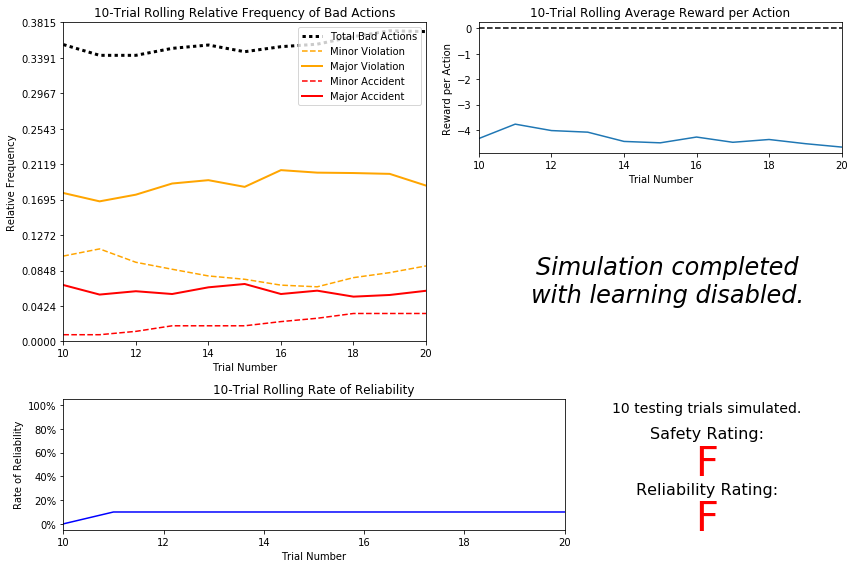

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

In [3]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Calculate how many actions resulted in an accident where action 3 and 4 mean the following:
# 3: Minor traffic violation causing an accident
# 4: Major traffic violation causing an accident

data = pd.read_csv('logs/sim_no-learning.csv')
display(data.head())

print (data['actions'][0:5])
actions = dict(data['actions'])
total_accidents = 0
# Loop through values because the keys are indices and we care about the actual actions dict
for action_str in actions.values():
    # Turn every action string into a dictionary
    actions_dict = eval(action_str)
    total_accidents += actions_dict[3] + actions_dict[4]
print "Total number of accidents: {}".format(total_accidents)

,trial,testing,parameters,initial_deadline,final_deadline,net_reward,actions,success
0,1,False,"{'a': 0.5, 'e': 1.0}",35,0,-204.224269,"{0: 23, 1: 2, 2: 6, 3: 0, 4: 4}",0
1,2,False,"{'a': 0.5, 'e': 1.0}",25,0,-67.407901,"{0: 18, 1: 4, 2: 1, 3: 1, 4: 1}",0
2,3,False,"{'a': 0.5, 'e': 1.0}",20,0,-102.987715,"{0: 13, 1: 3, 2: 2, 3: 0, 4: 2}",0
3,4,False,"{'a': 0.5, 'e': 1.0}",25,0,-77.114652,"{0: 16, 1: 4, 2: 4, 3: 0, 4: 1}",0
4,5,False,"{'a': 0.5, 'e': 1.0}",25,0,-174.562646,"{0: 12, 1: 2, 2: 8, 3: 1, 4: 2}",0


0    {0: 23, 1: 2, 2: 6, 3: 0, 4: 4}
1    {0: 18, 1: 4, 2: 1, 3: 1, 4: 1}
2    {0: 13, 1: 3, 2: 2, 3: 0, 4: 2}
3    {0: 16, 1: 4, 2: 4, 3: 0, 4: 1}
4    {0: 12, 1: 2, 2: 8, 3: 1, 4: 2}
Name: actions, dtype: object
Total number of accidents: 68


### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** After 10 testing trials the smartcab received an F for both safety and reliability. This is not surprising given that the cab was moving in random directions every time step. The top left plot shows the relative frequency of bad actions after 10 trials. The relative frequency of total bad actions was about 0.35 and out of the four possible traffic violations possible, major violation was the most frequent (0.17). There were actually 68 total bad actions that caused an accident (calculated in the code block above). The rate of reliability starts at 0% and stays at around 10% for the rest of the trails. This makes sense since the smartcab is making random moves and while it is likely that it will occasionally make a correct action or move in the direction of the destination (both of which give it a positive reward) it wouldn't raise the reliability rating very high, especially since the smartcab never made it to its destination in the simulation and makes several other errors. 

The smartcab receives rewards for doing a "right" action. This can be driving through an intersection when there is a green light, not moving when there is a red light, moving towards the destination, and not committing any traffic violations. By looking at some of the terminal output I can see that the smartcab was penalized heavily most of the time and often made the wrong choice. Driving towards the destination can yield a reward of somewhere around 2 while causing a major accident can give it a reward of -40. The top right plot shows the average reward per action over all the trials. The average reward is in the negative for every trial and gets lower as the number of trials increases. Seeing as how the smartcab rarely makes a correct decision this makes sense, it is constantly getting negative rewards and lowering its average reward per action with every trial.

This smartcab is definitely not safe or reliable for its passengers. It often commits traffic violations and causes major accidents and never once reached its destination before the deadline passed.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** I think two of the three features (waypoint and inputs) are relevant for learning both safety and efficiency. Waypoint is useful for efficiency because it helps the smartcab know which is the best direction to travel that will lead to its destination. If the smartcab doesn't know where to go then it probably won't reach its destination before the deadline. Input is important for safety because it gives the smartcab the information it needs to avoid committing a traffic violation or being in an accident. For example if the smartcab doesn't know that a vehicle across the intersection from it is going to make a right turn and the smartcab makes a left turn then they are going to crash. Inputs are essential for safety. However I think that deadline is not necessary for efficiency or safety. If the smartcab knows how much time is left to reach the destination then it might try to get there before time runs out even if it needs to commit traffic violations to do so. If a smartcab drives safely and knows the waypoint then it should eventually get there. Adding a deadline may just add unnecessary pressure to the smartcab.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** Based on my answer from the previous question the state space would have 384 states. 3 states for *'waypoint'* (forward, left, and right), 2 states for light (red and green), 4 for *'left'* (forward, left, right, and None), 4 for *'right'* (forward, left, right, and None), and 4 for *'oncoming'* (forward, left, right, and None). So 3\*4\*4\*4\*2 = 384. In simulator.py there is a line that says there must be a minimum of 20 training trials completed but this might probably won't be enough for the smartcab to experience all 384 states, especially if there is a time limit. However it might be enough to experience many of the states and learn a policy that performs reasonably well.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

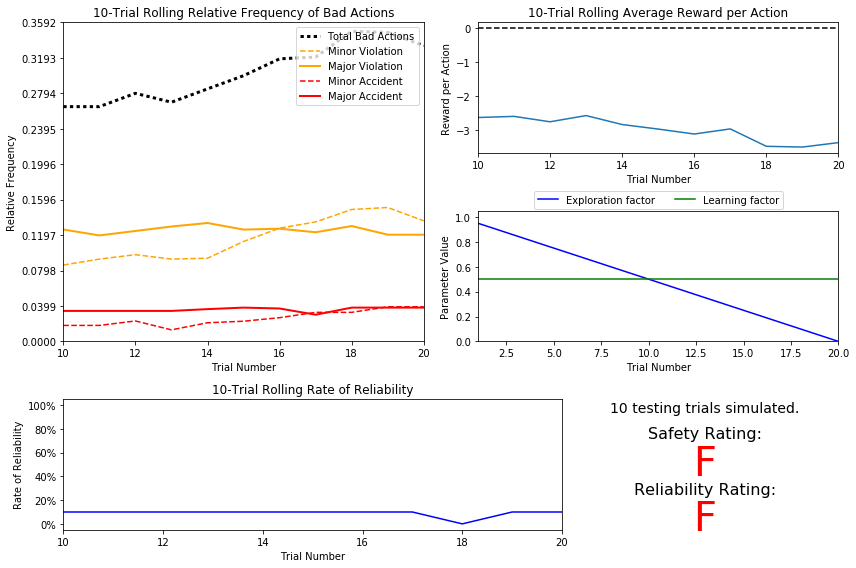

In [2]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

In [3]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Calculate how many actions resulted in an accident where action 3 and 4 mean the following:
# 3: Minor traffic violation causing an accident
# 4: Major traffic violation causing an accident

data = pd.read_csv('logs/sim_default-learning.csv')
display(data.head())

print (data['actions'][0:5])
actions = dict(data['actions'])
total_accidents = 0
# Loop through values because the keys are indices and we care about the actual actions dict
for action_str in actions.values():
    # Turn every action string into a dictionary
    actions_dict = eval(action_str)
    total_accidents += actions_dict[3] + actions_dict[4]
print "Total number of accidents: {}".format(total_accidents)

,trial,testing,parameters,initial_deadline,final_deadline,net_reward,actions,success
0,1,False,"{'a': 0.5, 'e': 0.95}",30,0,-91.891630,"{0: 20, 1: 3, 2: 6, 3: 0, 4: 1}",0
1,2,False,"{'a': 0.5, 'e': 0.8999999999999999}",20,0,-33.259611,"{0: 15, 1: 1, 2: 4, 3: 0, 4: 0}",0
2,3,False,"{'a': 0.5, 'e': 0.8499999999999999}",20,0,-41.457122,"{0: 15, 1: 2, 2: 1, 3: 2, 4: 0}",0
3,4,False,"{'a': 0.5, 'e': 0.7999999999999998}",20,0,-81.161607,"{0: 15, 1: 3, 2: 0, 3: 0, 4: 2}",0
4,5,False,"{'a': 0.5, 'e': 0.7499999999999998}",25,0,-85.534648,"{0: 18, 1: 1, 2: 4, 3: 1, 4: 1}",0


0    {0: 20, 1: 3, 2: 6, 3: 0, 4: 1}
1    {0: 15, 1: 1, 2: 4, 3: 0, 4: 0}
2    {0: 15, 1: 2, 2: 1, 3: 2, 4: 0}
3    {0: 15, 1: 3, 2: 0, 3: 0, 4: 2}
4    {0: 18, 1: 1, 2: 4, 3: 1, 4: 1}
Name: actions, dtype: object
Total number of accidents: 44


### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** After modifying the *agent.py* file and running it the smartcab still received an F for safety and reliability. The 10-trial rolling rate of reliability plot in the bottom left corner is similar to the last csv file plot. Like the previous plot, the rate of reliability stays at about 10% except at trial 18 where it dips to 0%. The 10-trial rolling average reward per action plot is also similar to the previous one except this one has a slightly higher average reward. According to the 10-trial rolling relative frequency of bad actions there are slightly fewer traffic violations than the previous simulation without any learning. And although there were 44 total accidents (fewer than 68 from previous simulation), there frequency of total bad actions increases as the trials go on. In addition to these plots there is a new one plotting the exploration and learning factors over the trials. As the trials go on the exploration factor (epsilon) decreases which is consistent with the code where we are decreasing the epsilon variable by 0.05 every trial.

The driving agent required 20 training trials before testing began. The results are bad for the smartcab plus the rolling average reward is far below zero meaning the smartcab is making more mistakes than correct moves. I also noticed during the training trials that the smartcab would sometimes get stuck going in a circle. For some reason it would keep making right turns at intersections and never get any closer to the destination.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

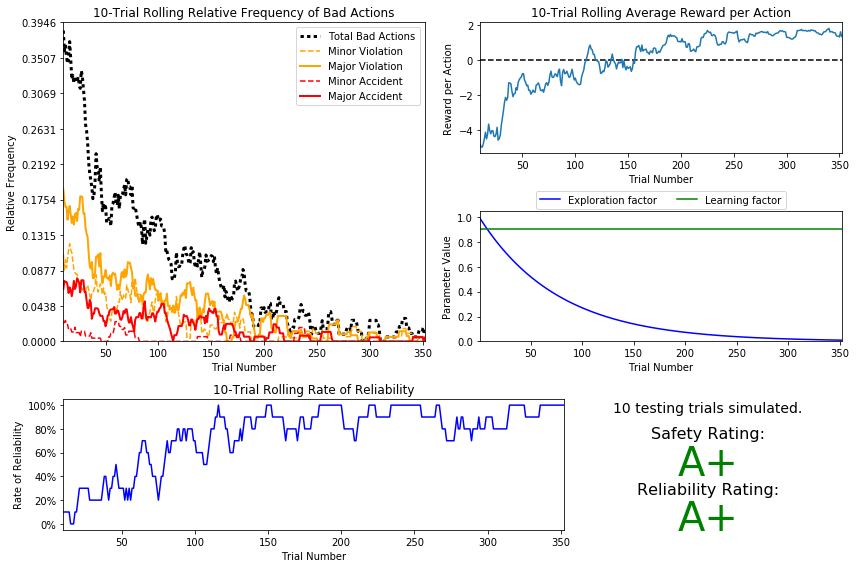

In [34]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** The decaying function I used was the following equation: $\epsilon$ = $\epsilon$ * 0.987. This means that I am changing the epsilon value to 98.7% of its previous value. I am using a tolerance of 0.01 so there will be 352 training trials. I thought this was a good number of training trials since I have 384 states and I want the smartcab to experience as many of those states as it can before testing starts. It is not enough to cover all the states possible but I think that it should be enough for the smartcab to perform reasonable well. I also chose an alpha value of 0.9 because I wanted a larger step size so that when the Q value for each state-action is updated, the old Q value changes depending on the new reward. As opposed to an alpha value of 0 where the reward is completely disregarded and the Q value never changes.

This Q-Learner has improved a lot compared the the previous ones. The reliability and safety have higher ratings, the relative frequency of bad actions goes down significantly as the number of trials increases (where as before they mostly stayed the same), the rolling rate of reliability goes up as number of trials goes on (before it stayed at 10%), and the rolling average reward per action goes up as trials increases (it actually gets positive later on, going to around +2).

I think that this Q-Learner successfully learned an optimal policy for the smartcab agent. 
However a single bad action can have a very large negative reward. And since good actions have smaller positive rewards, one bad action can completely tank the safety rating. I think one reason I got an A+ on the safety rating was because there was only 10 testing trials and if there had been more than the probability of there being a single bad action would be high and the safety rating would be much lower. However this may be a good thing because in real life an actual smartcab shouldn't make a single bad action or else someone could be injured. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** Like the description above, the optimal policy for the smartcab is following the U.S. right-of-way traffic laws. In the *agent.py* file I put the following information into the state space: waypoint, light, oncoming, left, and right. In other words the states we care about are where the destination is with respect to the current location of the smartcab, the traffic light (whether it is green or red), and which direction the cars in the intersection are turning (forward, left, or right). An optimal policy will have the smartcab taking an action that doesn't break any laws (driving through red light), hit any other cars, and moves in the direction of the destination.

If the smartcab is stopped at an intersection and the light is red and the destination is two spaces in the left direction then the correct action would be to do nothing and wait until the light turns green. Then when the light turns green the smartcab doesn't need to consider what direction the cars to the left and right are going to go, but it should care about the oncoming. If the oncoming wants to go forward or left then the smartcab should wait because that would cause an accident. Or it can find an alternate route. 

State is defined as follows:

**State = (waypoint, inputs['light'], inputs['oncoming'], inputs['right'], inputs['left'])**

In *sim-improved-learning.txt* most of the policies are correct for a given state. Like when state = ('right', 'red', 'left', 'forward', None) where state is defined by (waypoint, inputs['light'], inputs['oncoming'], inputs['right'], inputs['left']) and the best action according to Q-Learner is doing nothing. The actions forward and left are heavily penalized which is good because that would mean breaking the law and causing an accident. However there are actions that aren't the best though. Like where state = ('forward', 'green', 'right', 'left', 'left') and the Q-Learner says the best action is to go right, but this doesn't follow the waypoint even though there wouldn't be a traffic violation or accident if it did go forward and follow waypoint. And it says the best action is right and the other actions have a Q-value of 0. This means that during training when it was in this state it chose a random action that happened to be right. But then the next time it was in this state it either chose right randomly again or chose right because it had the highest Q-value. But it never had the opportunity to try the other actions where it would see that moving left would cause an accident and going forward would give it a reward that is higher than going right because it doesn't break any laws and follows the waypoint. Another example of it learning the optimal policy is with this state: 

state = ('forward', 'red', None, 'right', None)

 -- None : 2.28
 
 -- forward : -10.00
 
 -- right : 0.21
 
 -- left : -8.58
 
The waypoint is forward but it knows that going forward on a red light is wrong so a reward of -10 is placed on that action. Going left also has negative reward because of the red light. Going right has a slighly positive reward but the largest reward is doing nothing which is correct becuase if it waits until the light is green then it can go forward and continue following the waypoint.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** Using future rewards requires the  algorithm to find the max reward of the next step in the algorithm. This won't work because the action that leads to the highest reward isn't known. The dummy agents are moving randomly so the scenario for the next state isn't known until it happens and therefore the rewards for that state won't be known (or it will have to consider every possible scenario for the next time step given the current coordinates of the smartcab and surrounding dummy agents). So we can't use it in our calculation for a new Q value. Another problem is that the waypoint is being used to guide the smartcab to its destination but if future rewards are considered then it will eventually learn that following the path to the destination will give it the highest rewards, without needing the waypoint state. So having the waypoint state gives the smartcab the same info as having a discount factor but without the heavy computation (calculating max reward for next state).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.